In [1]:
import numpy as np
import pandas as pd

In [2]:
#小数点3桁まで表示するがIPythonのバージョン差異で動かないorz
%precision 3

pd.set_option('precision', 3)

In [3]:
#CSVを読み込む
df = pd.read_csv('data/ch2_scores_em.csv', index_col='生徒番号')
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [4]:
#配列に入れる
scores = np.array(df['英語'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [5]:
#データフレームにセットする
scores_df = pd.DataFrame({'点数':scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='生徒'))
scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [6]:
#平均値
sum(scores) / len(scores)

55.0

In [7]:
#平均値
np.mean(scores)

55.0

In [8]:
#平均値
df.mean()

英語    58.38
数学    78.88
dtype: float64

In [9]:
#平均値
scores_df.mean()

点数    55.0
dtype: float64

In [10]:
#昇順にソート
sorted_socres = np.sort(scores)
sorted_socres

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [11]:
#中央値
n = len(sorted_socres)
if n % 2 == 0:
    m_1 = sorted_socres[n // 2 - 1]
    m = sorted_socres[n // 2]
#     median = (m_1 + m) / 2
    median = float((m_1 + m) / 2)
else:
#     median = sorted_socres[n // 2]
    median = float(sorted_socres[n // 2])
median
type(median)

float

In [12]:
#中央値
np.median(scores)

56.5

In [13]:
#中央値
scores_df.median()

点数    56.5
dtype: float64

In [14]:
#最頻値
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [15]:
#最頻値
pd.Series([1, 2 ,3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [16]:
#偏差
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [17]:
#平均値
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_mean

55.0

In [18]:
#偏差
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [19]:
#偏差の平均を取る
np.mean(deviation)

0.0

In [20]:
#偏差の平均を取る
np.mean(another_deviation)

0.0

In [21]:
#データフレームに偏差をセットする
summary_df = scores_df.copy()
summary_df['偏差'] = deviation
summary_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [22]:
#偏差の平均
summary_df.mean()

点数    55.0
偏差     0.0
dtype: float64

In [23]:
#標本分散
sum(deviation ** 2) / len(deviation)

86.0

In [24]:
#標本分散
np.mean(deviation ** 2)

86.0

In [25]:
#標本分散
np.var(scores)

86.0

In [26]:
#標本分散
scores_df.var(ddof=0)

点数    86.0
dtype: float64

In [27]:
#不偏分散
sum(deviation ** 2) / (len(deviation) - 1)

95.55555555555556

In [28]:
#不偏分散
scores_df.var()

点数    95.556
dtype: float64

In [29]:
#不偏分散
np.var(scores,ddof=1)

95.55555555555556

In [30]:
#偏差の二乗
summary_df['偏差二乗'] = np.square(deviation)
summary_df

,点数,偏差,偏差二乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [31]:
#それぞれの平均
summary_df.mean()

点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64

In [32]:
#標準偏差
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [33]:
#標準偏差
np.std(scores, ddof=0)

9.273618495495704

In [34]:
#最大値
np.max(scores)

69

In [35]:
#最小値
np.min(scores)

41

In [36]:
#範囲
np.max(scores) - np.min(scores)

28

In [37]:
#第1四分位点
scores_Q1 = np.percentile(scores, 25)
scores_Q1

48.25

In [38]:
#第2四分位点 中央値
scores_Q2 = np.percentile(scores, 50)
scores_Q2

56.5

In [39]:
#第3四分位点
scores_Q3 = np.percentile(scores, 75)
scores_Q3

63.25

In [40]:
#四分位範囲
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [41]:
#指標をまとめて出力
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

In [42]:
#基準化変量
z = (scores - np.mean(scores)) / np.std(scores, ddof=0)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [43]:
#基準化変量の平均 0にならないのおかしくないか
np.mean(z)

-1.6653345369377347e-17

In [44]:
#基準化変量の標準偏差 1にならないのおかしくないか
np.std(z, ddof=0)

0.9999999999999999

In [45]:
#偏差値
x = 50 + 10 * (scores - np.mean(scores)) / np.std(scores, ddof=0)
x

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [46]:
#データフレームに偏差値をセット
scores_df['偏差値'] = x
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [47]:
#50人分の英語の配列
english_scores = np.array(df['英語'])
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [48]:
#指標をまとめて出力
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [49]:
#度数
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [50]:
#データフレームに度数をセット
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({'度数':freq},index=pd.Index(freq_class, name='階級'))
freq_dist_df

,度数
階級,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [51]:
#階級値
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [52]:
#相対度数
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [53]:
#累積相対度数
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [54]:
#データフレームに階級値、相対度数、累積相対度数をセット
freq_dist_df['階級値'] = class_value
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
freq_dist_df = freq_dist_df[['階級値','度数','相対度数','累積相対度数']]
freq_dist_df

,階級値,度数,相対度数,累積相対度数
階級,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [55]:
#階級値の最頻値
freq_dist_df.loc[freq_dist_df['度数'].idxmax(),'階級値']

65

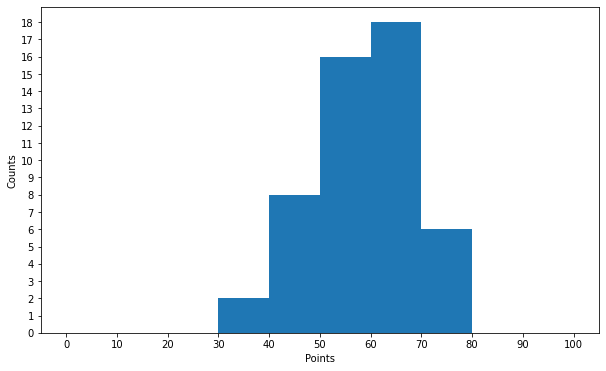

In [56]:
import matplotlib.pyplot as plt

#グラフがnotebook上に表示されるようにする
%matplotlib inline

#キャンパス
fig = plt.figure(figsize=(10,  6))
ax = fig.add_subplot(111)

#階級数10、最小値0、最大値100
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))

#X軸にラベルを付ける 日本語文字化けしとるやないか
#ax.set_xlabel('点数')
ax.set_xlabel('Points')

#Y軸にラベルを付ける
ax.set_ylabel('Counts')

#X軸に10単位の目盛りを記載
#numpy.linspace(start, stop, element, endpoint=True)
ax.set_xticks(np.linspace(0, 100, 11))

#Y軸に1単位の目盛りを記載
#numpy.arange(stop)
#0 ≦ n < stop
ax.set_yticks(np.arange(0, freq.max()+1))

#描画
plt.show()

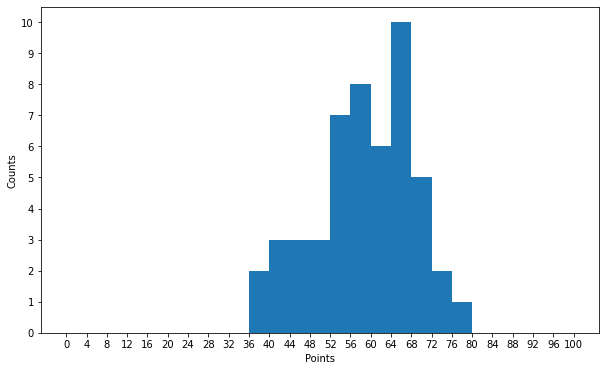

In [57]:
#階級数を25、階級幅を4にしてみる
#キャンパス
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

#階級数25、最小値0、最大値100
freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))

#X軸、Y軸のラベル
ax.set_xlabel('Points')
ax.set_ylabel('Counts')

#X軸, Y軸の目盛り
ax.set_xticks(np.linspace(0, 100, 26))
ax.set_yticks(np.arange(0, freq.max()+1))

#描画
plt.show()

In [58]:
freq

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  3.,  3.,
        7.,  8.,  6., 10.,  5.,  2.,  1.,  0.,  0.,  0.,  0.,  0.])

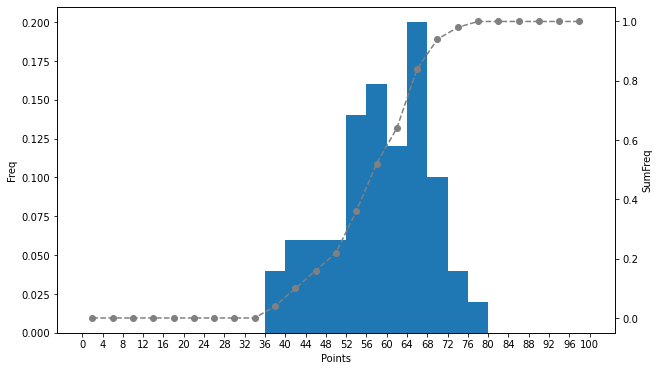

In [59]:
#相対度数のヒストグラムと累積相対度数の曲線を重ねて描画する
#キャンパス
fig = plt.figure(figsize=(10, 6))
ax_hist = fig.add_subplot(111)
ax_freq = ax_hist.twinx()

#相対度数の重みづけ
weights =np.ones_like(english_scores) / len(english_scores)

#度数のヒストグラム
rel_freq, _, _ = ax_hist.hist(english_scores, bins=25, range=(0, 100), weights=weights)

#相対度数のヒストグラム
cum_rel_freq = np.cumsum(rel_freq)

#階級値
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

#累積相対度数のグラフ設定
ax_freq.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')

#X軸、Y軸ラベルをそれぞれセット
ax_hist.set_xlabel('Points')
ax_hist.set_ylabel('Freq')
ax_freq.set_ylabel('SumFreq')

#X軸の目盛りをセット
ax_hist.set_xticks(np.linspace(0, 100, 26))

plt.show()

In [60]:
weights

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [61]:
rel_freq

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.06,
       0.06, 0.06, 0.14, 0.16, 0.12, 0.2 , 0.1 , 0.04, 0.02, 0.  , 0.  ,
       0.  , 0.  , 0.  ])

In [62]:
cum_rel_freq

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.1 ,
       0.16, 0.22, 0.36, 0.52, 0.64, 0.84, 0.94, 0.98, 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  ])

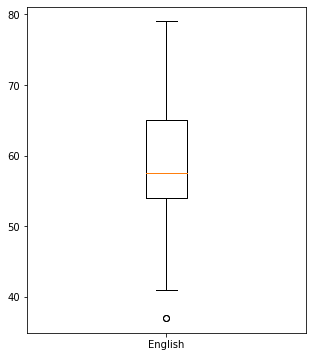

In [63]:
#箱ひげ図
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['English'])
plt.show()

In [64]:
from plot_util import plot_var_interact, plot_std_interact

#分散
plot_var_interact(scores[:4])

interactive(children=(IntSlider(value=42, description='A', min=1), IntSlider(value=69, description='B', min=1)…

In [65]:
#標準偏差
plot_std_interact(scores)

interactive(children=(IntSlider(value=42, description='A', min=1), IntSlider(value=69, description='B', min=1)…